In [7]:
import time
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
# comment below code if you want to see the action happening on browser
#options.add_argument('headless')

# Importing the Keys module to perform keyborad functions automatically like CTRL+A
from selenium.webdriver.common.keys import Keys

# Creating a webdriver instance
# Provide the path of the webdriver in your system.
driver = webdriver.Chrome('D:\\DS\\Python\\chromedriver_win32\\chromedriver.exe')  

# Choosing website page URL to scrape
URL='https://indianexpress.com/article/india/coronavirus-india-world-news-live-updates-covid-19-corona-cases-deaths-tally-in-india-today-latest-news-oxford-astrazeneca-vaccine-6591445'
driver.get(URL)

# Finding any html tags which say body
TextBody = driver.find_element_by_css_selector('body')

# Selecting all the text present in the body
TextBody.send_keys(Keys.CONTROL+'a')

In [8]:
# Text cleaning
import re

RawFullText=TextBody.text

# Removing the \n characters from the text
CleanText=re.sub('\n',' ',RawFullText)
# removing everything which is not Alphabets
CleanText = re.sub(r'[^a-z A-Z]',r'',CleanText)

In [9]:
# Printing some sample text to see the cleaned result
CleanText[0:1000]

'ENGLISH Follow Us Monday October   Home India Cities Bihar Elections Opinion IPL  Entertainment Lifestyle Tech Videos Explained Epaper SUBSCRIBE Sign in BIHAR POLLS Hit by lockdown a call for change from chacha Nitish to bhatijas Prev Next Stop HomeIndiaHIGHLIGHTS Will resume Covid vaccine trials after DCGI nod says Serum Institute HIGHLIGHTS Will resume Covid vaccine trials after DCGI nod says Serum Institute As many as  deaths reported in India during last  hours period pushed the death toll to  At present the country has  active cases and  people who have been treated and discharged By Express Web Desk  New Delhi  Updated September    am Unexpected sideeffects after a drug has regulatory approval are rare but the speed at which a COVID vaccine is being pursued increases the risks of unforeseen conditions Reuters The Serum Institute of India SII Saturday said that phase  and  clinical trials of the OxfordAstraZeneca COVID vaccine candidate will resume after receiving a green signal 

In [10]:
# Finding important keywords
from textblob import TextBlob
ImpPhrases=TextBlob(CleanText).noun_phrases
ImpPhrases

WordList(['english', 'us', 'october', 'india cities bihar elections opinion ipl entertainment lifestyle tech videos explained epaper subscribe sign', 'bihar polls', 'nitish', 'prev', 'stop homeindiahighlights will', 'covid', 'vaccine trials', 'dcgi', 'serum', 'highlights will', 'covid', 'vaccine trials', 'dcgi', 'serum', 'india', 'hours period', 'death toll', 'active cases', 'express web desk', 'delhi updated september', 'unexpected', 'regulatory approval', 'covid', 'unforeseen conditions', 'reuters', 'serum', 'india sii', 'clinical trials', 'oxfordastrazeneca covid', 'vaccine candidate', 'green signal', 'drugs', 'india dcgi', 'astrazeneca', 'clinical trials', 'medicines', 'regulatory', 'mhra', 'latestage trials', 'adverse reaction', 'uk following', 'serum', 'india sii', 'clinical trials', 'vaccine candidate', 'india cautioning', 'guard till', 'effective anticoronavirus medicine', 'prime', 'narendra modi', 'hindi', 'jab', 'tak dawai nahi tab tak dhilai nahi', 'carelessness till', 'indi

In [11]:
# replacing spaces with underscore to be used in the wordcloud

# creating  an empty list to hold the results
ImpPhrasesCombined=[]
for phrase in ImpPhrases:
    ImpPhrasesCombined.append(re.sub(' ','_',phrase))
    
ImpPhrasesCombined

['english',
 'us',
 'october',
 'india_cities_bihar_elections_opinion_ipl_entertainment_lifestyle_tech_videos_explained_epaper_subscribe_sign',
 'bihar_polls',
 'nitish',
 'prev',
 'stop_homeindiahighlights_will',
 'covid',
 'vaccine_trials',
 'dcgi',
 'serum',
 'highlights_will',
 'covid',
 'vaccine_trials',
 'dcgi',
 'serum',
 'india',
 'hours_period',
 'death_toll',
 'active_cases',
 'express_web_desk',
 'delhi_updated_september',
 'unexpected',
 'regulatory_approval',
 'covid',
 'unforeseen_conditions',
 'reuters',
 'serum',
 'india_sii',
 'clinical_trials',
 'oxfordastrazeneca_covid',
 'vaccine_candidate',
 'green_signal',
 'drugs',
 'india_dcgi',
 'astrazeneca',
 'clinical_trials',
 'medicines',
 'regulatory',
 'mhra',
 'latestage_trials',
 'adverse_reaction',
 'uk_following',
 'serum',
 'india_sii',
 'clinical_trials',
 'vaccine_candidate',
 'india_cautioning',
 'guard_till',
 'effective_anticoronavirus_medicine',
 'prime',
 'narendra_modi',
 'hindi',
 'jab',
 'tak_dawai_nahi_ta

In [12]:
# combining the list as a single string
ImpPhrasesForWordCloud=' '.join(ImpPhrasesCombined)
ImpPhrasesForWordCloud

'english us october india_cities_bihar_elections_opinion_ipl_entertainment_lifestyle_tech_videos_explained_epaper_subscribe_sign bihar_polls nitish prev stop_homeindiahighlights_will covid vaccine_trials dcgi serum highlights_will covid vaccine_trials dcgi serum india hours_period death_toll active_cases express_web_desk delhi_updated_september unexpected regulatory_approval covid unforeseen_conditions reuters serum india_sii clinical_trials oxfordastrazeneca_covid vaccine_candidate green_signal drugs india_dcgi astrazeneca clinical_trials medicines regulatory mhra latestage_trials adverse_reaction uk_following serum india_sii clinical_trials vaccine_candidate india_cautioning guard_till effective_anticoronavirus_medicine prime narendra_modi hindi jab tak_dawai_nahi_tab_tak_dhilai_nahi carelessness_till india lakh_coronavirus_cases total_tally death_toll active_cases globally india brazil_live_blog_delhi_metro full_services lakh_cases india_read ist_sep_will covid vaccine_trials dcgi s

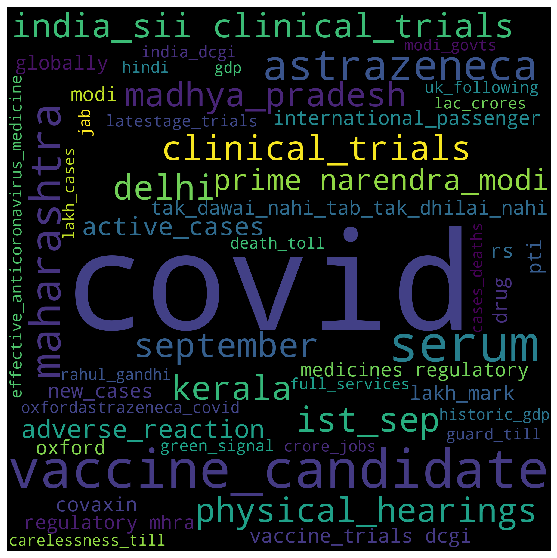

In [13]:
# Generating the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

customStopwords=list(STOPWORDS)
wordcloudimage = WordCloud(max_words=50,
                           font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords + ['india'],
                            width=2000,
                            height=2000
                          ).generate(ImpPhrasesForWordCloud)

params = plt.gcf()
params.set_figwidth(15)
params.set_figheight(10)
plt.imshow(wordcloudimage)
plt.axis("off") # the x-y axis numbers scale are removed
plt.show()

COVID-19 News Highlights:

Covid in India is started from Kerala. But its spread all over india rapidly because of the entry of International passenger's. No vaccine to cure COVID is found yet, because of that the Death toll of Active cases can't be controlled and reached lakh mark. Few Citizen's have came forward to trail the sample vaccine's and the good news is the clinical trails are on the last stage. PM Narendra Modi requested the citizen's to be careful and promises to take neccessary measures.